In [1]:
import torch
import torch.nn.functional as F

# Example data
input_data = torch.tensor([[2.0, 3.0, 5.0],[2.0, 3.0, 5.0]], requires_grad=True)
target_data = torch.tensor([[1.0, 2.0, 4.0],[1.0, 2.0, 4.0]], requires_grad=False)

# Compute MSE loss
loss = F.mse_loss(input_data, target_data,reduction='none')

print("Input data:", input_data)
print("Target data:", target_data)
print("MSE Loss:", loss.mean(dim=1))


Input data: tensor([[2., 3., 5.],
        [2., 3., 5.]], requires_grad=True)
Target data: tensor([[1., 2., 4.],
        [1., 2., 4.]])
MSE Loss: tensor([1., 1.], grad_fn=<MeanBackward1>)


In [2]:
import numpy as np
import torch
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
from util import get_transforms, get_image_size

%reload_ext autoreload
%autoreload 2

In [3]:
dataset = 'CIFAR10'
image_size = get_image_size(dataset)
transform, reverse_transform = get_transforms(image_size=image_size[1:])

In [4]:
def plot_revere_diffusion_imgs(infer_samples, idx, ax):
    image = infer_samples[idx][-1]
    ax.imshow(image)
    ax.axis('off')

In [5]:
infer_samples, ood_detect_result = torch.load('./results/test_ood_detection_power_cifar10_299_3.pt')
detect_timesteps = np.linspace(0, 1000, 10, endpoint=False).astype(int)
len(ood_detect_result)/len(detect_timesteps)

100.0

In [6]:
detect_r = []
for i in range(100):
    ind = False
    for j, timestep in enumerate(detect_timesteps):
        if ood_detect_result[i*len(detect_timesteps)+j][0]:
            ind = True
    detect_r.append(ind)

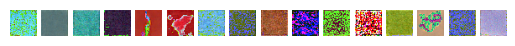

In [9]:
fig, axes = plt.subplots(1, np.sum(detect_r))
for i, idx in enumerate(np.arange(0,100,1)[detect_r]):
    plot_revere_diffusion_imgs(infer_samples, idx, axes[i])

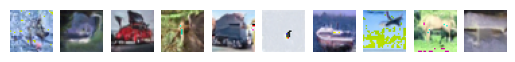

In [18]:
fig, axes = plt.subplots(1, 10)
for i, idx in enumerate(np.random.choice(100, 10, replace=False)):
    plot_revere_diffusion_imgs(infer_samples, idx, axes[i])